In [ ]:
!pip install -q transformers

In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=1aA1WGON49E"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'1aA1WGON49E'

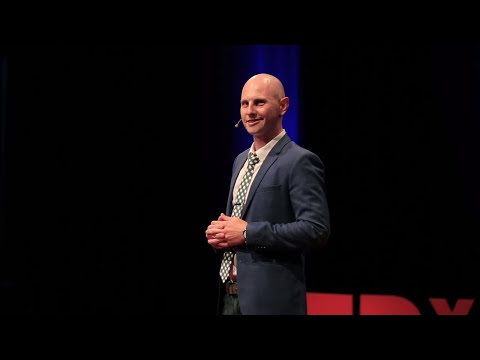

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [ ]:
transcript[0:5]

[{'text': 'Transcriber: Victor Borges\nReviewer: David DeRuwe',
  'start': 0.0,
  'duration': 7.0},
 {'text': 'Wow,', 'start': 11.791, 'duration': 1.008},
 {'text': 'what an audience.', 'start': 13.03, 'duration': 1.19},
 {'text': "But if I'm being honest,\nI don't care what you think of my talk.",
  'start': 14.515,
  'duration': 3.016},
 {'text': "I don't.", 'start': 18.097, 'duration': 1.004}]

In [ ]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

937


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:


num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 Transcriber: Victor Borges
Reviewer: David DeRuwe Wow, what an audience. But if I'm being honest,
I don't care what you think of my talk. I don't. I care what the internet
thinks of my talk. (Laughter) Because they are the ones
who get it seen and shared. And I think that's where
most people get it wrong. They're talking to you, here, instead of talking to you,
random person scrolling Facebook. Thanks for the click. You see, back in 2009, we all had these weird little things
called attention spans. (Laughter) Yeah, they're gone. They're gone.
We killed them. They're dead. I'm trying to think of the last time
I watched an 18-minute TED talk. It's been years, literally years. So if you're giving
a TED talk, keep it quick. I'm doing mine in under a minute. I'm at 44 seconds right now; that means we've got
time for one final joke. Why are balloons so expensive? (Audience) "Why?" Woody Roseland: Inflation. (Laughter) (Applause)
Summarized text
 Victor Borges: "I don't care what

In [ ]:
len(str(summarized_text))

331

In [ ]:
str(summarized_text)

'[\' Victor Borges: "I don\\\'t care what you think of my talk. I care what the internetthinks" "Most people get it wrong. They\\\'re talking to you, here, instead of talking to a random person scrolling Facebook," Borges says . "I\\\'m trying to think of the last time I watched an 18-minute TED talk. It\\\'s been years, literally years"\']'